In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import norm

In [2]:
import sys
import os
sys.path.append(os.path.abspath("../scripts"))
try:
    from eda import ExplanatoryAnalysis
except:
    print("import error")

In [3]:
df_finance = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw11\\Data\\financial_raw_data.csv')
df_finance.head()

,Date,Close_BND,Close_SPY,Close_TSLA,High_BND,High_SPY,High_TSLA,Low_BND,Low_SPY,Low_TSLA,Open_BND,Open_SPY,Open_TSLA,Volume_BND,Volume_SPY,Volume_TSLA
0,2015-01-02,62.573158,172.592896,14.620667,62.603442,173.811130,14.883333,62.399026,171.542703,14.217333,62.406598,173.391052,14.858000,2218800,121465900,71466000
1,2015-01-05,62.754799,169.475891,14.006000,62.777511,171.702294,14.433333,62.610951,169.165038,13.810667,62.641235,171.534266,14.303333,5820100,169632600,80527500
2,2015-01-06,62.936523,167.879623,14.085333,63.125795,170.316066,14.280000,62.860816,167.073070,13.614000,62.860816,169.786764,14.004000,3887600,209151400,93928500
3,2015-01-07,62.974377,169.971603,14.063333,63.050084,170.316070,14.318667,62.875958,168.770189,13.985333,62.944093,169.223867,14.223333,2433400,125346700,44526000
4,2015-01-08,62.875946,172.987793,14.041333,62.921369,173.206241,14.253333,62.815378,171.383108,14.000667,62.921369,171.399902,14.187333,1873400,147217800,51637500


In [4]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2535 non-null   object 
 1   Close_BND    2535 non-null   float64
 2   Close_SPY    2535 non-null   float64
 3   Close_TSLA   2535 non-null   float64
 4   High_BND     2535 non-null   float64
 5   High_SPY     2535 non-null   float64
 6   High_TSLA    2535 non-null   float64
 7   Low_BND      2535 non-null   float64
 8   Low_SPY      2535 non-null   float64
 9   Low_TSLA     2535 non-null   float64
 10  Open_BND     2535 non-null   float64
 11  Open_SPY     2535 non-null   float64
 12  Open_TSLA    2535 non-null   float64
 13  Volume_BND   2535 non-null   int64  
 14  Volume_SPY   2535 non-null   int64  
 15  Volume_TSLA  2535 non-null   int64  
dtypes: float64(12), int64(3), object(1)
memory usage: 317.0+ KB


In [5]:
df_finance.describe().T

,count,mean,std,min,25%,50%,75%,max
Close_BND,2535.0,6.928945e+01,4.792146e+00,6.186087e+01,6.556527e+01,6.832913e+01,7.287993e+01,7.882327e+01
Close_SPY,2535.0,3.160674e+02,1.179269e+02,1.568008e+02,2.148420e+02,2.771179e+02,4.058692e+02,6.097500e+02
Close_TSLA,2535.0,1.178482e+02,1.165083e+02,9.578000e+00,1.722800e+01,3.029800e+01,2.215250e+02,4.798600e+02
High_BND,2535.0,6.939126e+01,4.800409e+00,6.193737e+01,6.563018e+01,6.845787e+01,7.294644e+01,7.892020e+01
High_SPY,2535.0,3.177257e+02,1.184864e+02,1.578641e+02,2.157022e+02,2.779195e+02,4.091343e+02,6.107800e+02
High_TSLA,2535.0,1.204748e+02,1.192360e+02,1.033133e+01,1.752767e+01,3.232933e+01,2.266967e+02,4.885400e+02
Low_BND,2535.0,6.918601e+01,4.782142e+00,6.182263e+01,6.547548e+01,6.816975e+01,7.272879e+01,7.878803e+01
Low_SPY,2535.0,3.141579e+02,1.172699e+02,1.546769e+02,2.142069e+02,2.760737e+02,4.028309e+02,6.068000e+02
Low_TSLA,2535.0,1.150975e+02,1.136989e+02,9.403333e+00,1.694200e+01,2.976000e+01,2.170617e+02,4.575100e+02
Open_BND,2535.0,6.929322e+01,4.793200e+00,6.189146e+01,6.555271e+01,6.831023e+01,7.284570e+01,7.888497e+01


In [6]:
df_bnd = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw11\\Data\\BND_raw_data.csv')
df_spy = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw11\\Data\\SPY_raw_data.csv')
df_tsla = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw11\\Data\\TSLA_raw_data.csv')

In [7]:
bnd_eda = ExplanatoryAnalysis()
spy_eda = ExplanatoryAnalysis()
tsla_eda = ExplanatoryAnalysis()

In [8]:
df_bnd=bnd_eda.to_time(df_bnd, "BND")
df_spy=spy_eda.to_time(df_spy, 'SPY')
df_tsla=tsla_eda.to_time(df_tsla, "TSLA")

In [9]:
bnd_rolling = bnd_eda.rolling(df_bnd)
spy_rolling = spy_eda.rolling(df_spy)
tsla_rolling = tsla_eda.rolling(df_tsla)

c:\Users\Aman\Desktop\kifyaw11\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>


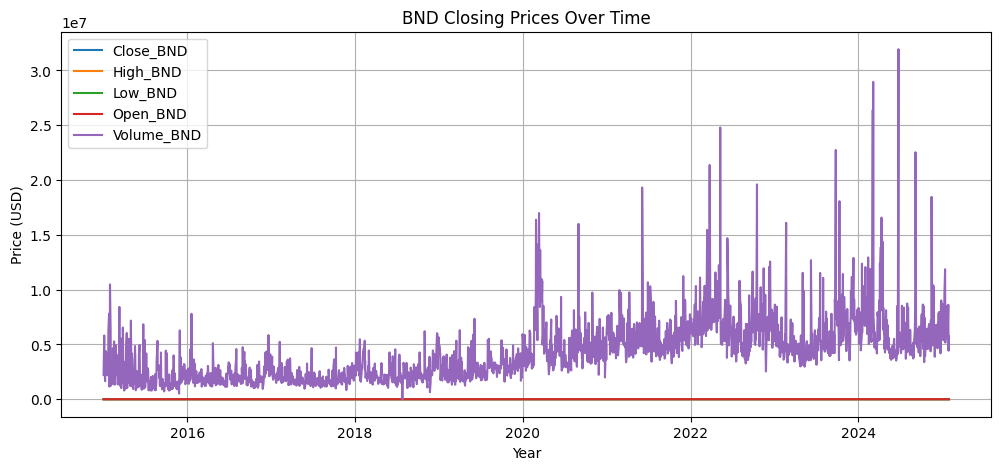

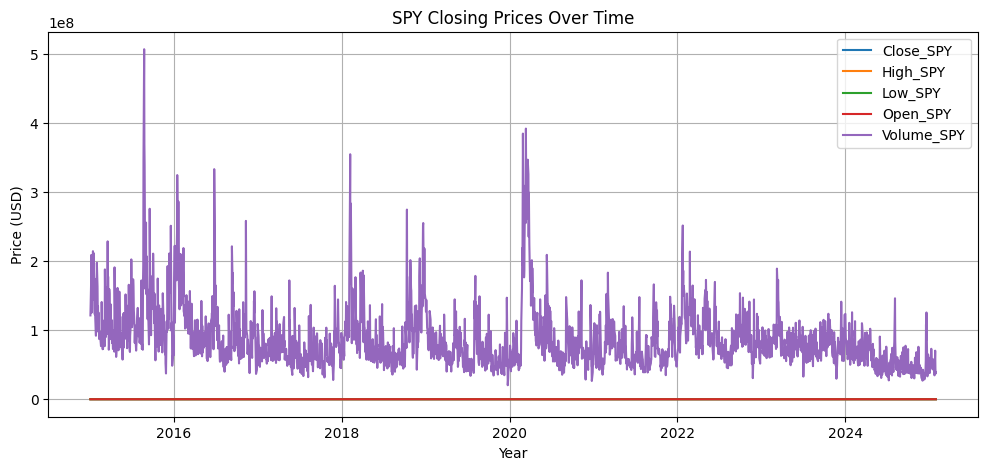

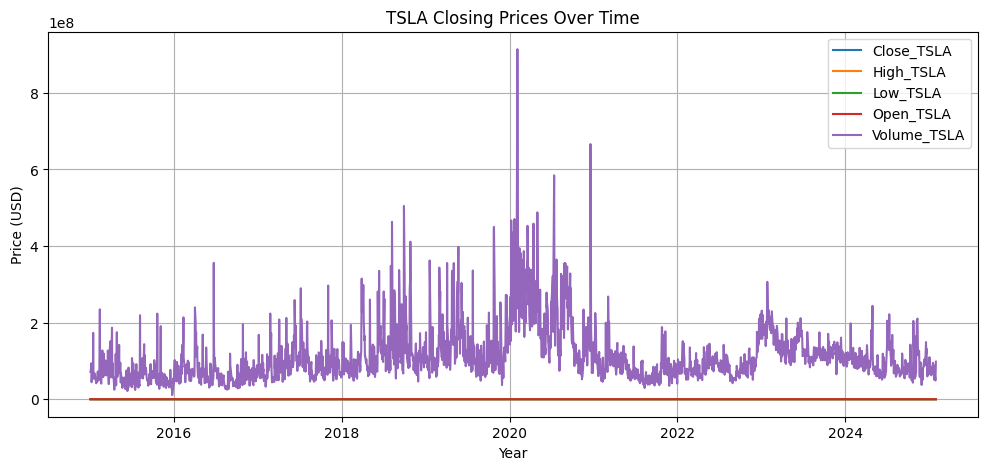

In [10]:
print(bnd_eda.plot_closing_price(df_bnd))
print(spy_eda.plot_closing_price(df_spy))
print(tsla_eda.plot_closing_price(df_tsla))

<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>


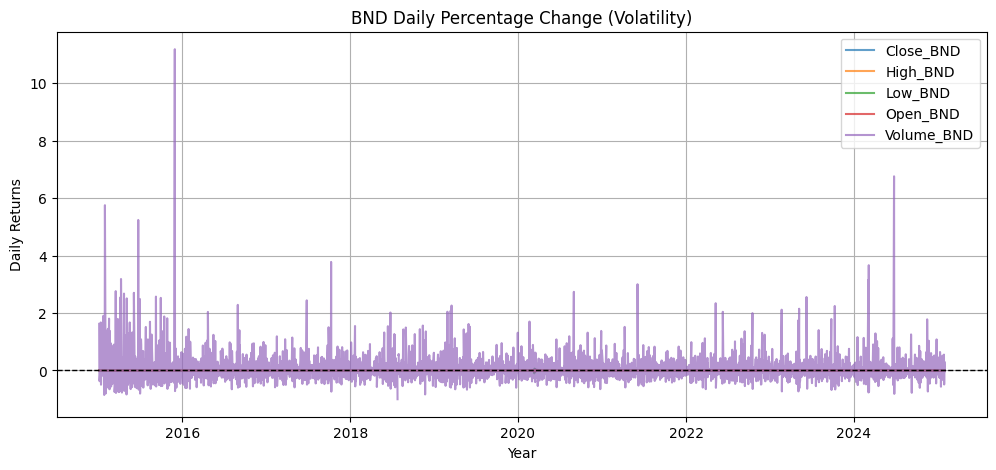

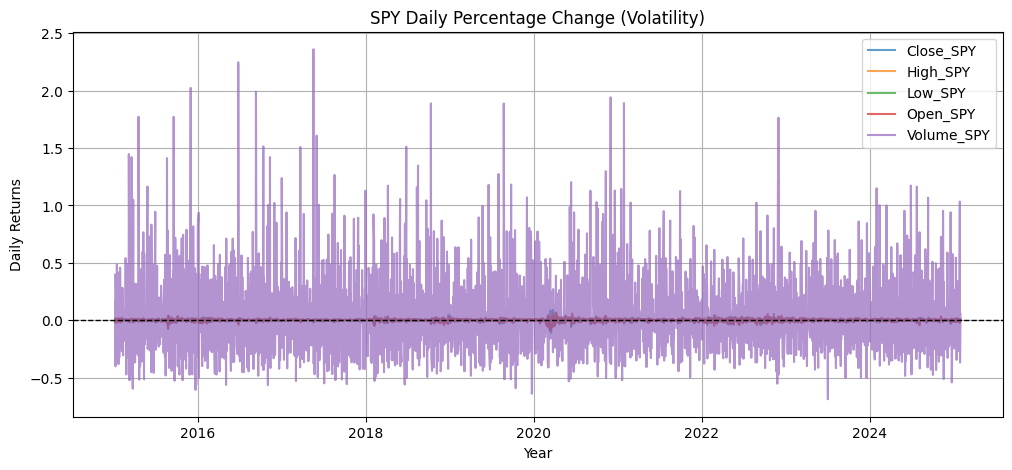

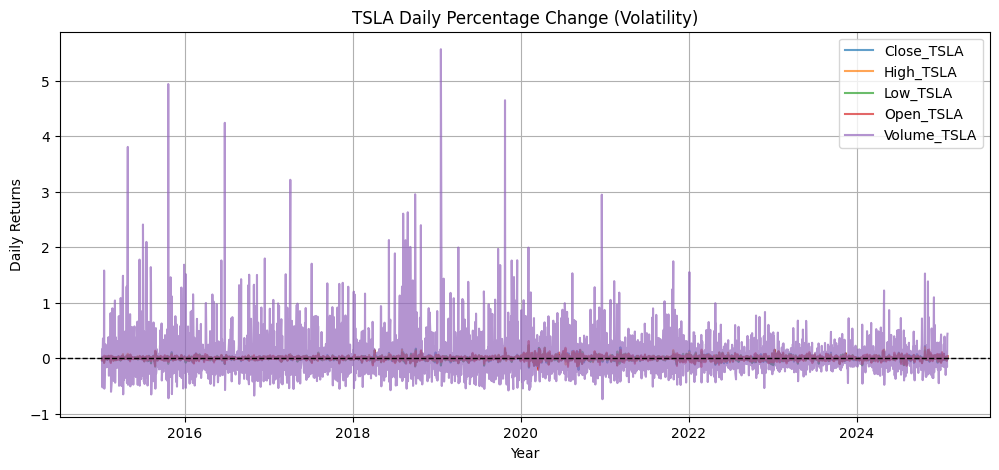

In [11]:
print(bnd_eda.plot_daily_percentage_change(df_bnd))
print(spy_eda.plot_daily_percentage_change(df_spy))
print(tsla_eda.plot_daily_percentage_change(df_tsla))

<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>


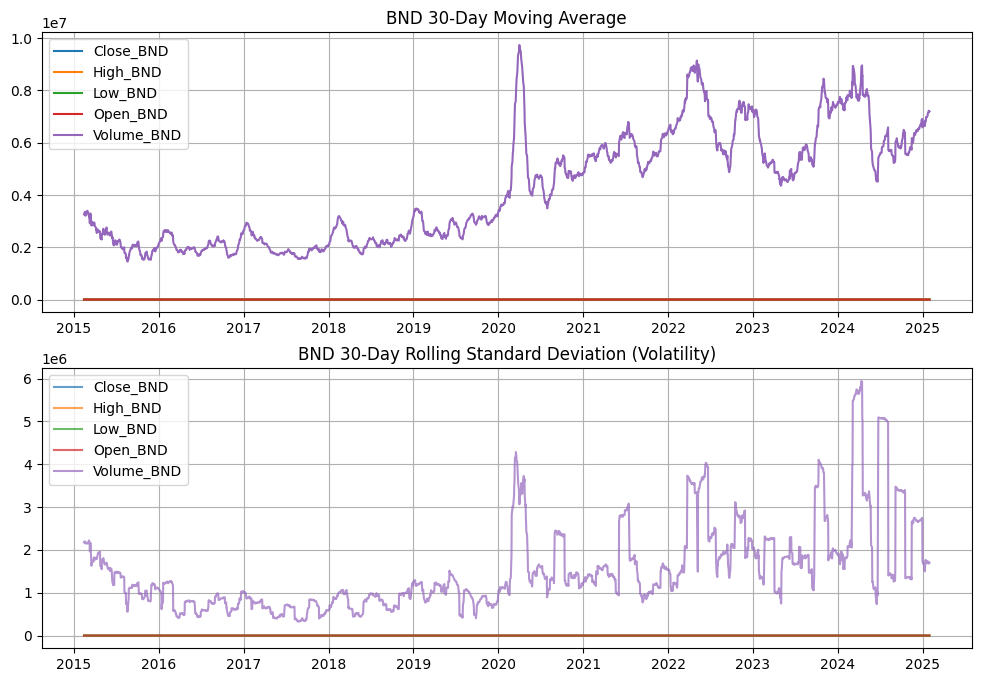

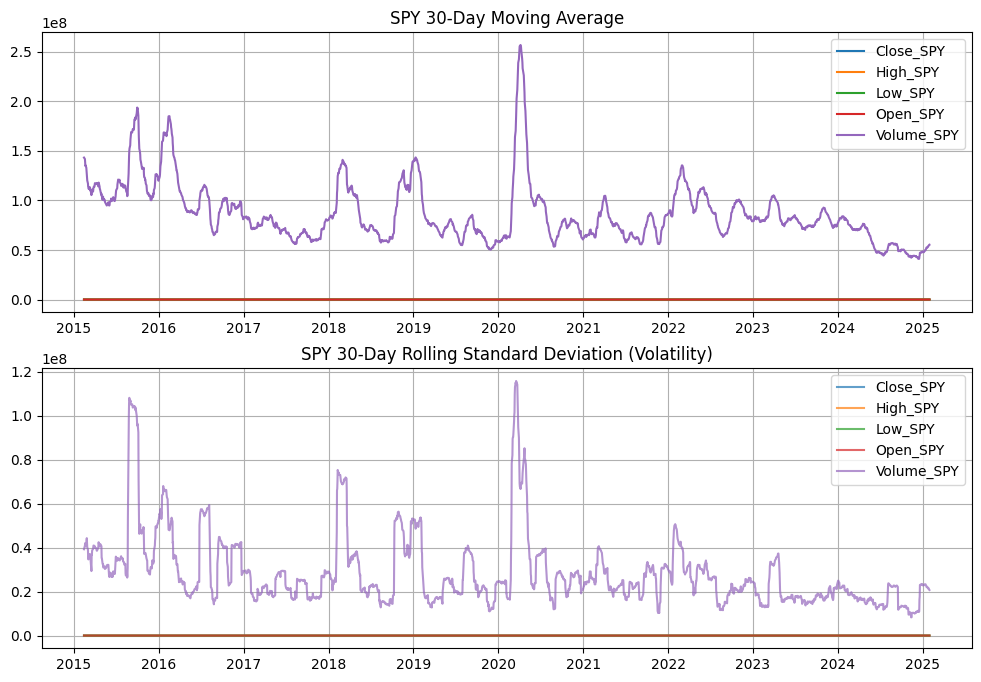

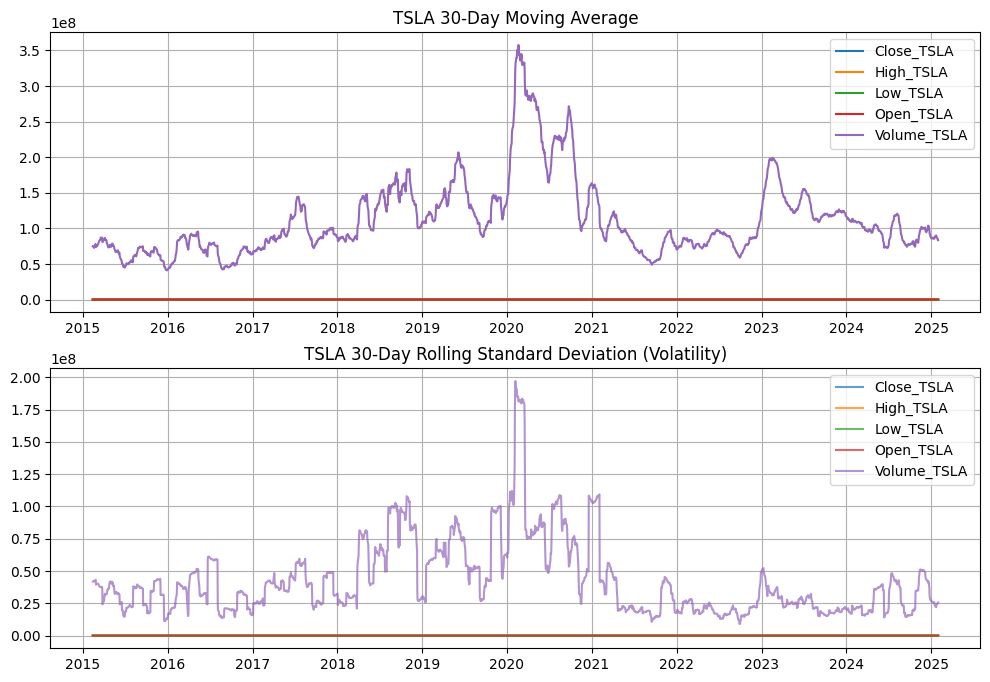

In [12]:
print(bnd_eda.plot_rolling_mean(df_bnd))
print(spy_eda.plot_rolling_mean(df_spy))
print(tsla_eda.plot_rolling_mean(df_tsla))

<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>


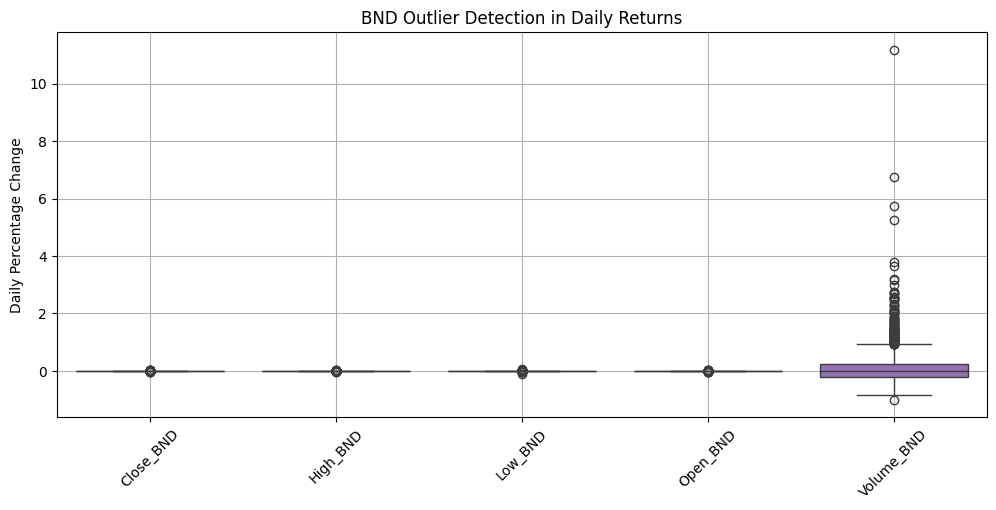

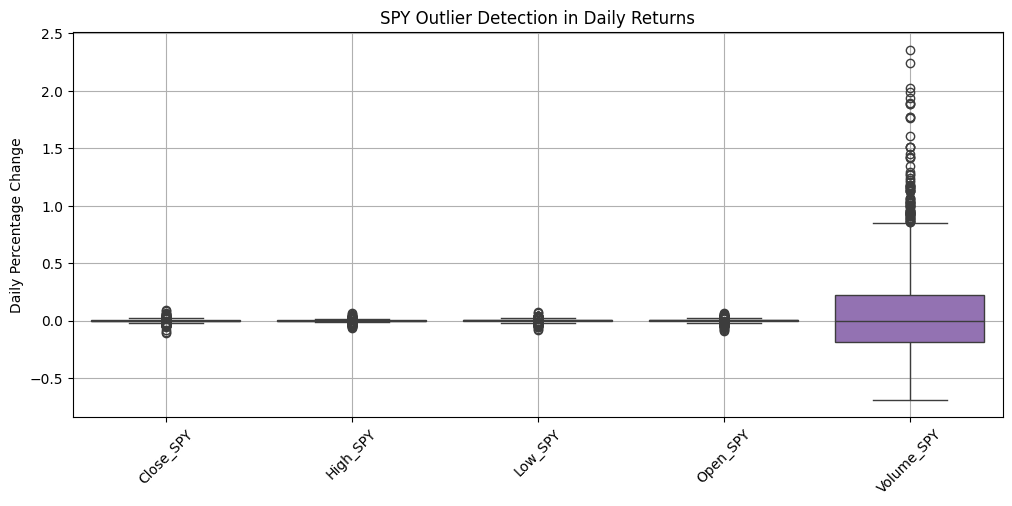

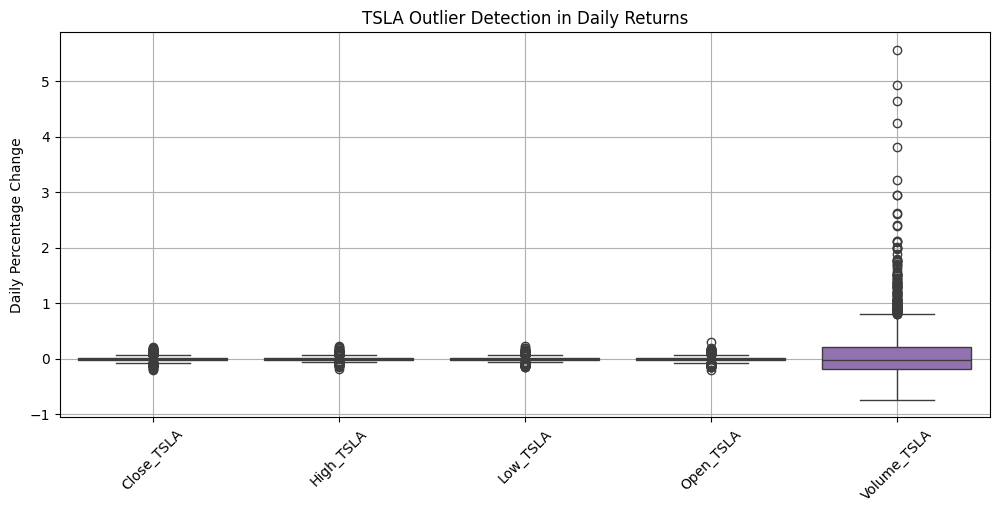

In [13]:
print(bnd_eda.box_plot(df_bnd))
print(spy_eda.box_plot(df_spy))
print(tsla_eda.box_plot(df_tsla))

<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>


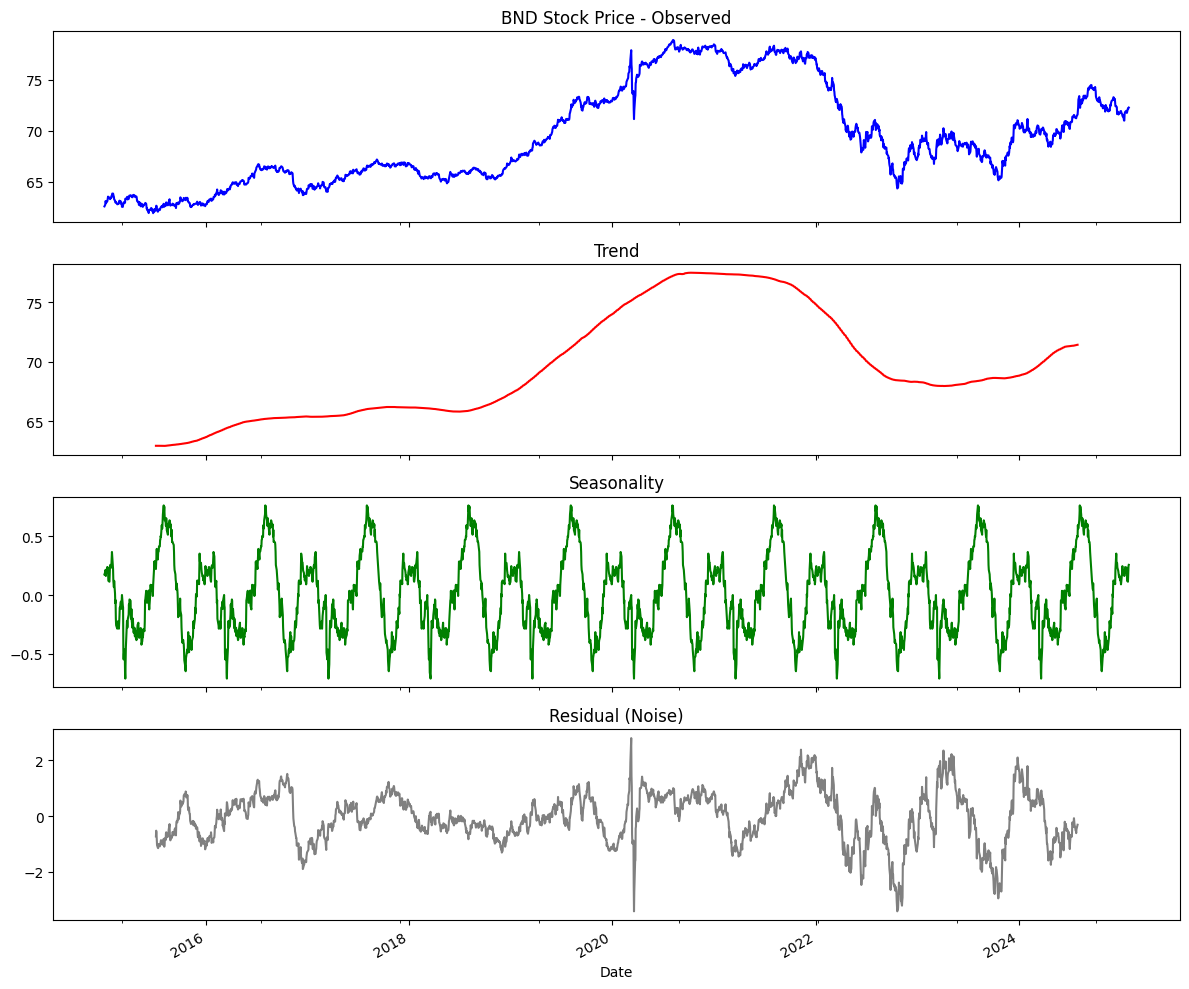

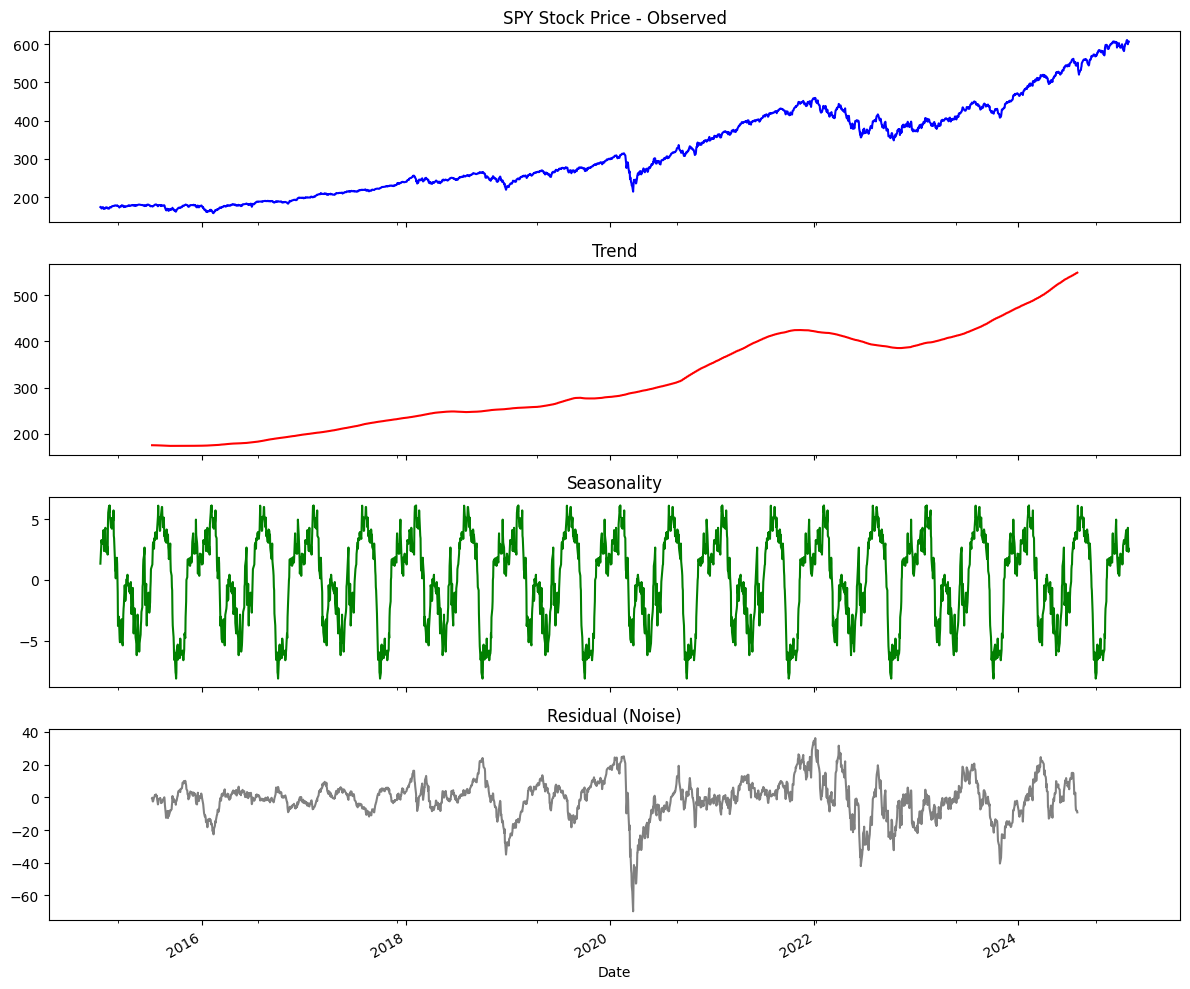

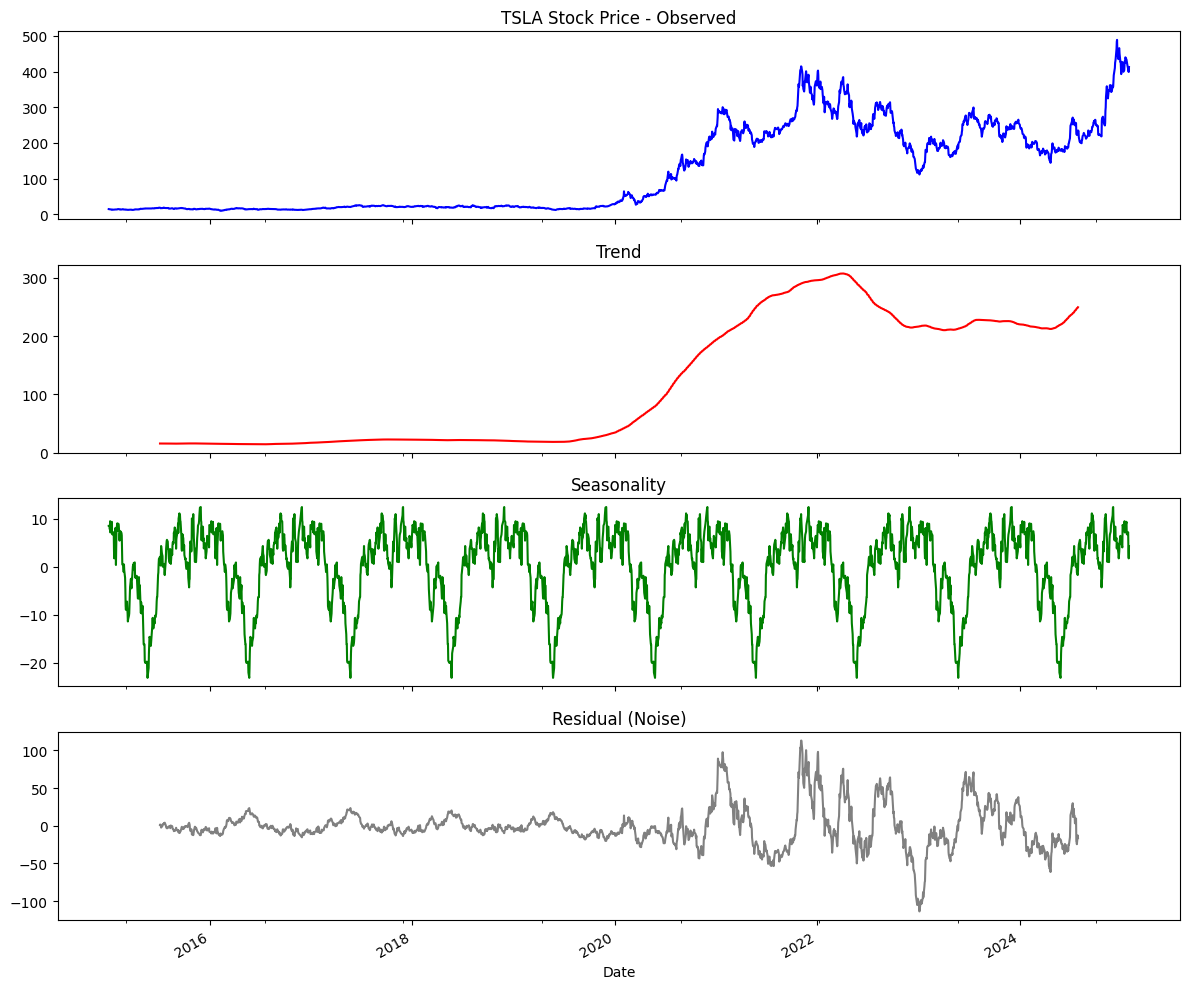

In [14]:
print(bnd_eda.plot_trend(df_bnd))
print(spy_eda.plot_trend(df_spy))
print(tsla_eda.plot_trend(df_tsla))

BND's Value at Risk (95% confidence level): -0.0045
Sharpe Ratio: 0.0209
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>
SPY's Value at Risk (95% confidence level): -0.0131
Sharpe Ratio: 0.0613
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>
TSLA's Value at Risk (95% confidence level): -0.0461
Sharpe Ratio: 0.0563
<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw11\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>


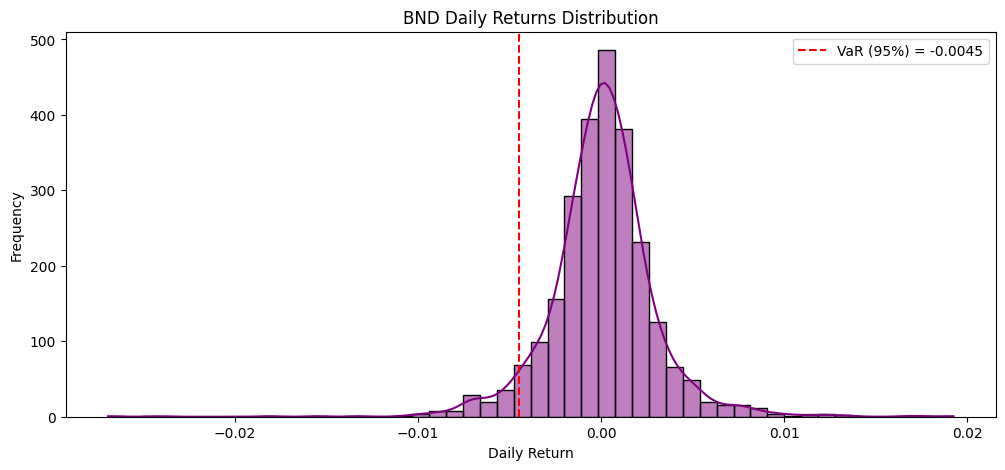

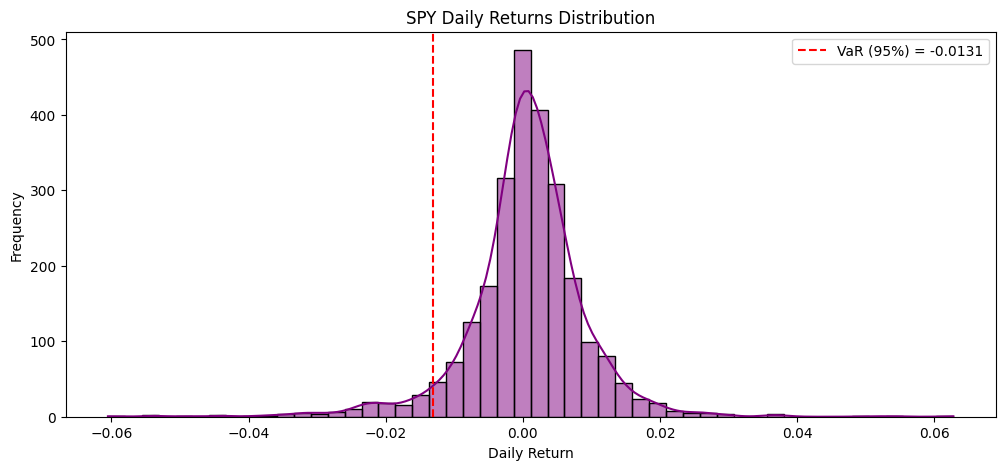

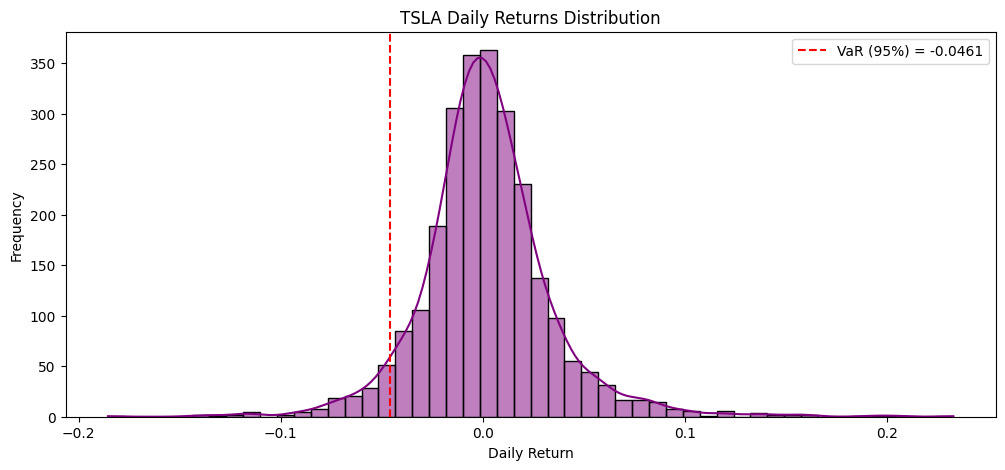

In [ ]:
print(bnd_eda.value_at_risk(df_bnd))
print(spy_eda.value_at_risk(df_spy))
print(tsla_eda.value_at_risk(df_tsla))